# K-Nearest Neighbor

k-Nearest Neighbor makes predictions for each new point based on the points that are closest to the new point.
Contrary to other techniques that look at the data as a whole in order to learn patterns in the data, nearest neighbor only compares points closest to a new point. Therefore the technique won't be able to tell something about the drivers of a prediction. 

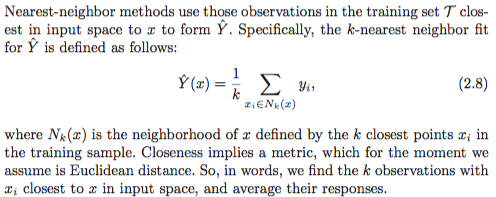

In [19]:
from IPython.display import Image
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/knn-formula.png')

In [63]:
from __future__ import division
from collections import Counter
from linear_algebra import distance
from statistics import mean
import math, random
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
# for example, classify a new data point, based on the labeled points closest to the new data point

# create a function that counts the outcome, e.g. votes
def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

# reduce k to 1
def majority_vote(labels):
    """assumes that labels are ordered from nearest to farthest"""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                      for count in vote_counts.values()
                      if count == winner_count])
    if num_winners == 1:
        return                            # unique winner
    else:
        return majority_vote(labels[:-1]) # try again without the farthest data point

In [21]:
# knn classifier:
def knn_classify(k, labeled_points, new_point):
    """ each labeled point should be a pair (point label)"""
    
    # order the labeled pints from nearest to farthest
    by_distance = sorted(labeled_points, 
                        key = lambda (point, _): distance(point, new_point))
    
    # find the labels for the k closest
    k_nearest_labels = [label for _, label in by_distance[:k]]
    
    # reduce k to 1
    return majority_vote(k_nearest_labels)

    Another example

In [77]:
cities = [(-86.75,33.5666666666667,'Python'),(-88.25,30.6833333333333,'Python'),(-112.016666666667,33.4333333333333,'Java'),(-110.933333333333,32.1166666666667,'Java'),(-92.2333333333333,34.7333333333333,'R'),(-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),(-118.233333333333,34.05,'Java'),(-122.316666666667,37.8166666666667,'R'),(-117.6,34.05,'Python'),(-116.533333333333,33.8166666666667,'Python'),(-121.5,38.5166666666667,'R'),(-117.166666666667,32.7333333333333,'R'),(-122.383333333333,37.6166666666667,'R'),(-121.933333333333,37.3666666666667,'R'),(-122.016666666667,36.9833333333333,'Python'),(-104.716666666667,38.8166666666667,'Python'),(-104.866666666667,39.75,'Python'),(-72.65,41.7333333333333,'R'),(-75.6,39.6666666666667,'Python'),(-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'Java'),(-81.3833333333333,28.55,'Java'),(-82.5333333333333,27.9666666666667,'Java'),(-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),(-87.75,41.7833333333333,'Java'),(-86.2833333333333,39.7333333333333,'Java'),(-93.65,41.5333333333333,'Java'),(-97.4166666666667,37.65,'Java'),(-85.7333333333333,38.1833333333333,'Python'),(-90.25,29.9833333333333,'Java'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),(-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),(-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),(-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'Java'),(-94.5833333333333,39.1166666666667,'Java'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),(-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'Java'),(-71.4333333333333,42.9333333333333,'R'),(-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),(-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),(-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'Java'),(-84.5166666666667,39.15,'Java'),(-81.85,41.4,'Java'),(-82.8833333333333,40,'Java'),(-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),(-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),(-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),(-97.7,30.3,'Python'),(-96.85,32.85,'Java'),(-95.35,29.9666666666667,'Java'),(-98.4666666666667,29.5333333333333,'Java'),(-111.966666666667,40.7666666666667,'Python'),(-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),(-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'Java')]
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]

In [78]:
# first step to plot the data

def plot_state_borders(plt, color='0.8'):
    pass

def plot_cities():
    
    # key is language, value is pair (longitudes, latitudes)
    plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

    # we want each language to have a different marker and color
    markers = {"Java": "o", "Python" : "s", "R": "^"}
    colors = {"Java": "r", "Python" : "b", "R": "g"}

    for (longitude, latitude), language in cities:
        plots[language][0].append(longitude)
        plots[language][1].append(latitude)

    # create a scatter series for each language
    for language, (x, y) in plots.iteritems():
        plt.scatter(x, y, color = colors[language], marker = markers[language], label = language, zorder = 10)
        plot_state_borders(plt) # pretend we have a function that does this

        plt.legend(loc = 0) # let matplot choose the location
        plt.axis([-130, -60, 20, 55]) # set the axes

        plt.title("Favorite Programming Languages")
        plt.show

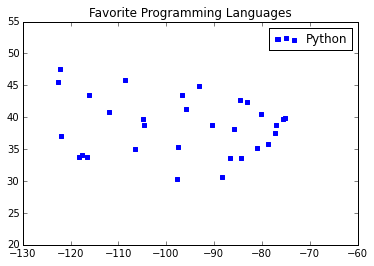

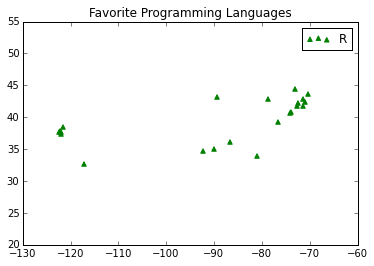

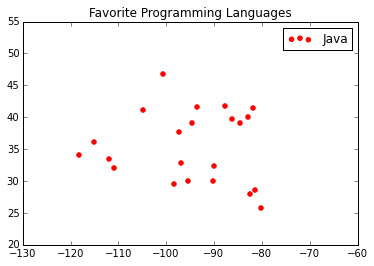

In [79]:
# key is language, value is pair (longitudes, latitudes)
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

# we want each language to have a different marker and color
markers = {"Java": "o", "Python" : "s", "R": "^"}
colors = {"Java": "r", "Python" : "b", "R": "g"}

for (longitude, latitude), language in cities:
    plots[language][0].append(longitude)
    plots[language][1].append(latitude)

# create a scatter series for each language
for language, (x, y) in plots.iteritems():
    plt.scatter(x, y, color = colors[language], marker = markers[language], label = language, zorder = 10)
    plot_state_borders(plt) # pretend we have a function that does this
    
    plt.legend(loc = 0) # let matplot choose the location
    plt.axis([-130, -60, 20, 55]) # set the axes

    plt.title("Favorite Programming Languages")
    plt.show()

In [84]:
for k in [1, 3, 5, 7]:
    num_correct = 0
    
    for city in cities:
        location, actual_language = city
        other_cities = [other_city
                       for other_city in cities
                       if other_city != city]
        
        predicted_language = knn_classify(k, other_cities, location)
        
        if predicted_language == actual_language:
            num_correct += 1

    print k, "neighbor[s]:", num_correct, "correct out of", len(cities)

1 neighbor[s]: 0 correct out of 75
3 neighbor[s]: 0 correct out of 75
5 neighbor[s]: 0 correct out of 75
7 neighbor[s]: 0 correct out of 75


In [40]:
import csv

with open('/Users/annalie/Dev/data-science-from-scratch/data/state_lon_lat.txt', 'rb') as f:
    reader = csv.reader(f, delimiter = ',')
    for row in reader:
        state = row[0]
        latitude = row[1]
        longitude= row[2]
        process(state, latitude, longitude)

IndexError: list index out of range

In [67]:
import pandas as pd

col = ['latitude', 'longitude']
data = pd.read_csv('/Users/annalie/Dev/data-science-from-scratch/data/state_lon_lat.csv', usecols = col, sep = ";")
data.head()
data_list = data.values.tolist()
data_list[:5]

[[613.85, '-1.522.683'],
 [327.99, '-868.073'],
 [349.51300000000003, '-923.809'],
 [142.417, '-1.707.197'],
 [337.712, '-1.113.877']]

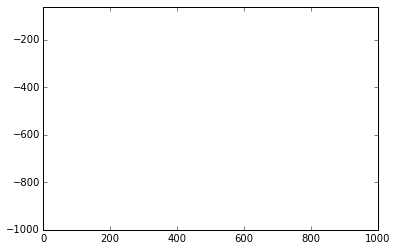

In [75]:
plt.plot(latitude, longitude)
plt.axis([0, 1000, -1000, -60])
plt.show()

In [81]:
def classify_and_plot_grid(k=1):
    plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
    markers = { "Java" : "o", "Python" : "s", "R" : "^" }
    colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

    for longitude in range(-130, -60):
        for latitude in range(20, 55):
            predicted_language = knn_classify(k, cities, [longitude, latitude])
            plots[predicted_language][0].append(longitude)
            plots[predicted_language][1].append(latitude)

In [82]:
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

for longitude in range(-130, -60):
    for latitude in range(20, 55):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)

KeyError: None